In [1]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = "0"
import torch

#torch.set_default_device('cuda')
#torch.cuda.set_device('cuda:1')
#print(torch.get_default_device())

import fit.sine_pde_eps as T
import numpy as n0

from IPython.display import HTML
from matplotlib.animation import FuncAnimation
import matplotlib.pyplot as plt

%matplotlib inline
torch.set_printoptions(precision=4, linewidth=500, sci_mode=True)

Using double precision solver
Multigrid: num grid  3
Using double precision solver
mi list ((0, 0), (1, 0), (0, 1), (2, 0), (0, 2))


/nfs/scistore19/locatgrp/apervez/work/mech-nn-dev/solver/lp_pde_central_diff.py:1120: UserWarning: Sparse CSR tensor support is in beta state. If you miss a functionality in the sparse tensor support, please submit a feature request to https://github.com/pytorch/pytorch/issues. (Triggered internally at ../aten/src/ATen/SparseCsrTensorImpl.cpp:53.)
  full_AtA = torch.mm(full_A.transpose(0,1),full_A).coalesce()
/nfs/scistore19/locatgrp/apervez/work/mech-nn-dev/solver/lp_pde_central_diff.py:1277: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.derivative_row_sorted = torch.tensor(row_sorted)
/nfs/scistore19/locatgrp/apervez/work/mech-nn-dev/solver/lp_pde_central_diff.py:1278: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather 

fullatannz 297472
Constraints Shape eq torch.Size([4096, 20480]), init torch.Size([252, 20480]), deriv torch.Size([32512, 20480])
Initial/boundary Constraints shape  torch.Size([1, 252, 20480])
mi list ((0, 0), (1, 0), (0, 1), (2, 0), (0, 2))
fullatannz 73984
Constraints Shape eq torch.Size([1024, 5120]), init torch.Size([124, 5120]), deriv torch.Size([8064, 5120])
Initial/boundary Constraints shape  torch.Size([1, 124, 5120])
mi list ((0, 0), (1, 0), (0, 1), (2, 0), (0, 2))
fullatannz 18304
Constraints Shape eq torch.Size([256, 1280]), init torch.Size([60, 1280]), deriv torch.Size([1984, 1280])
Initial/boundary Constraints shape  torch.Size([1, 60, 1280])


In [2]:
T.train()

/nfs/scistore19/locatgrp/apervez/miniforge3/envs/lppde/lib/python3.8/site-packages/lightning_fabric/plugins/environments/slurm.py:191: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /nfs/scistore19/locatgrp/apervez/miniforge3/envs/lpp ...
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/nfs/scistore19/locatgrp/apervez/miniforge3/envs/lppde/lib/python3.8/site-packages/pytorch_lightning/trainer/connectors/logger_connector/logger_connector.py:67: Starting from v1.9.0, `tensorboardX` has been removed as a dependency of the `pytorch_lightning` package, due to potential conflicts with other packages in the ML ecosystem. For this reason, `logger=True` will use `CSVLogger` as the default logger, unless the `tensorboard` or `tensorboardX` packages are found. Plea

Epoch 0:   0%|          | 0/1 [00:00<?, ?it/s] Parameter containing:
tensor([[[-4.6738e-02, -1.6276e+00, 9.4008e-01, 1.8024e-01, 9.0097e-01]]], device='cuda:0', dtype=torch.float64, requires_grad=True)
input nnz 20480 162816
input shape torch.Size([1, 4096, 20480]) torch.Size([1, 32512, 20480])
gmres step norm:  tensor([9.8618e-04], device='cuda:0', dtype=torch.float64) tensor([6.0238e-05], device='cuda:0', dtype=torch.float64)
qpf torch.Size([1, 20480])
backward tensor([7.6650e-03], device='cuda:0', dtype=torch.float64) tensor([2.1831e-01], device='cuda:0', dtype=torch.float64)
grad nnz 20480 162816
grad shape torch.Size([1, 4096, 20480]) torch.Size([1, 32512, 20480])
Epoch 1:   0%|          | 0/1 [00:00<?, ?it/s, v_num=1210, train_loss=1.260]        Parameter containing:
tensor([[[-4.7738e-02, -1.6286e+00, 9.3908e-01, 1.7924e-01, 8.9997e-01]]], device='cuda:0', dtype=torch.float64, requires_grad=True)
input nnz 20480 162816
input shape torch.Size([1, 4096, 20480]) torch.Size([1, 3251

/nfs/scistore19/locatgrp/apervez/miniforge3/envs/lppde/lib/python3.8/site-packages/pytorch_lightning/trainer/call.py:54: Detected KeyboardInterrupt, attempting graceful shutdown...


In [3]:
end = T.method.model.end
coord_dims = T.method.model.coord_dims
#_t = np.linspace(0, end, coord_dims[0])
target = T.dataset.y
damp = T.dataset.damp

In [ ]:
T.method.model.coeffs.shape

In [ ]:
damp

In [ ]:
target.shape

In [5]:
func_list = T.method.func_list
y_list = T.method.y_list
#n_iter =500

In [ ]:
(func_list[0].shape)

In [ ]:
t = np.linspace(0, end, coord_dims[0])
x = np.linspace(0, 10, coord_dims[1])

In [ ]:
#plot = plt.pcolormesh(t, x, target, cmap='RdBu', shading='flat')
#plot = plt.pcolormesh(t, x, target, cmap='RdBu')
plot = plt.pcolormesh(target, cmap='RdBu', shading='gouraud')
#plot = plt.pcolormesh(damp, cmap='RdBu', shading='gouraud')
#plot = plt.pcolormesh(func_list[-1].reshape((32,32)), cmap='RdBu', shading='gouraud')

In [ ]:
im = plt.imshow(target, interpolation='bilinear')

In [ ]:
plt.show()

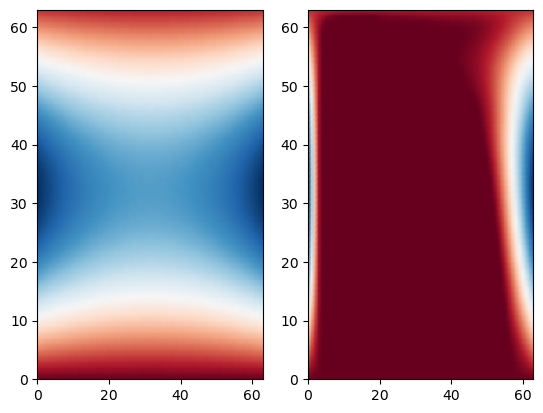

In [6]:
fig, ax = plt.subplots(1,2)
cax0 = ax[0].pcolormesh(y_list[-1].reshape(*coord_dims), cmap='RdBu', shading='gouraud')
cax1= ax[1].pcolormesh(func_list[-1].reshape(*coord_dims), cmap='RdBu', shading='gouraud')

def animate(i):
   cax0.set_array(y_list[i].reshape(*coord_dims).flatten())
   cax1.set_array(func_list[i].reshape(*coord_dims).flatten())

anim = FuncAnimation(fig, animate, interval=100, frames=len(func_list))
HTML(anim.to_html5_video())

In [ ]:

fig, ax = plt.subplots(1,1)
ax.set_xlim((0,end))
ax.set_ylim((-3,3))

line1, = ax.plot([], [])
line2, = ax.plot([], [])


def animate(t):
    line1.set_data(_y,y_list[2*t])
    line2.set_data(_y,func_list[2*t])
    return line1,
anim = FuncAnimation(fig, animate, frames=250, interval=20, blit=True)

HTML(anim.to_html5_video())